<a href="https://colab.research.google.com/github/caltunay/for_fun_EDAs/blob/master/Scala_in_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls = pd.read_csv('datasets/pulls.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

In [0]:
# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'], utc = True)

In [0]:
# Merge the two DataFrames
data = pulls.merge(pull_files, on = 'pid', how = 'inner')
# data.sample(3)

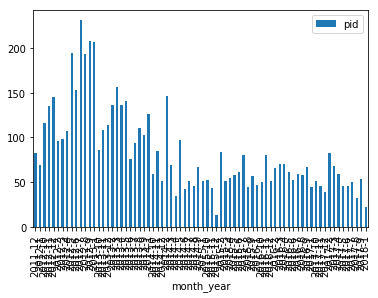

In [0]:
%matplotlib inline

# Create a column that will store the month and the year, as a string
pulls['month_year'] = pulls['date'].apply(lambda x: str(x.year) + '-' + str(x.month))

# Group by month_year and count the pull requests
counts = pulls.groupby('month_year').agg({'pid':'count'})

# Plot the results
counts.plot.bar()

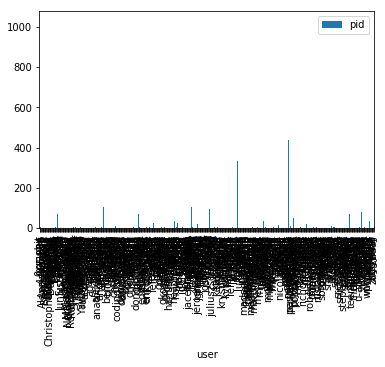

In [0]:
# Group by the submitter
by_user = pulls.groupby('user').agg({'pid':'count'})

# Plot the histogram
by_user.plot.bar()

In [0]:
# Identify the last 10 pull requests
last_10 = pulls.sort_index(by = 'date', ascending = False).head(10)

# Join the two data sets
joined_pr = last_10.merge(pull_files, on = 'pid')

# Identify the unique files
files = set(joined_pr['file'])

# # Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [0]:
# This is the file of interest:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr['user'].value_counts()

# Print the top 3 developers
author_counts.nlargest(3)

xeno-by     11
retronym     5
soc          4
Name: user, dtype: int64

In [0]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file']==file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on = 'pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user']) #set(joined_pr.sort_values(by = 'date', ascending = False)['user'])

# # Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

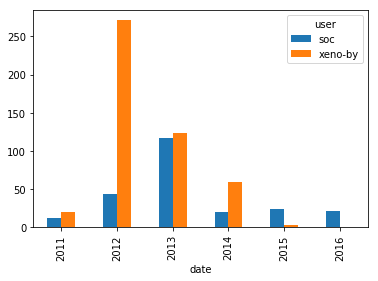

In [0]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind = 'bar')

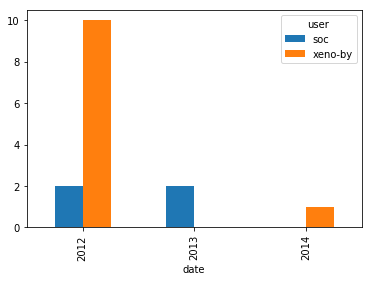

In [0]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
# grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
grouped = by_file.groupby(['user', by_file['date'].dt.year]).agg({'pid':'count'}).reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index = 'date', columns = 'user', values = 'pid', fill_value = 0)

# Plot the results
by_file_wide.plot(kind='bar')